# Homework 2 _ Regression

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

Import data

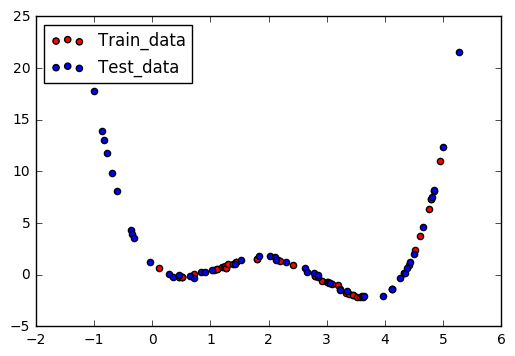

In [50]:
X_train = numpy.load(r'C:\Users\the_s\OneDrive\Documenti\Python\ML_Hw2\regression_Xtrain.npy')
Y_train = numpy.load(r'C:\Users\the_s\OneDrive\Documenti\Python\ML_Hw2\regression_Ytrain.npy')
X_test = numpy.load(r'C:\Users\the_s\OneDrive\Documenti\Python\ML_Hw2\regression_Xtest.npy')
Y_test = numpy.load(r'C:\Users\the_s\OneDrive\Documenti\Python\ML_Hw2\regression_Ytest.npy')

plt.scatter(X_train, Y_train, c='r', label='Train_data')
plt.scatter(X_test, Y_test, c='b', label='Test_data')
plt.legend(loc='upper left')
plt.show()

Fit a linear model

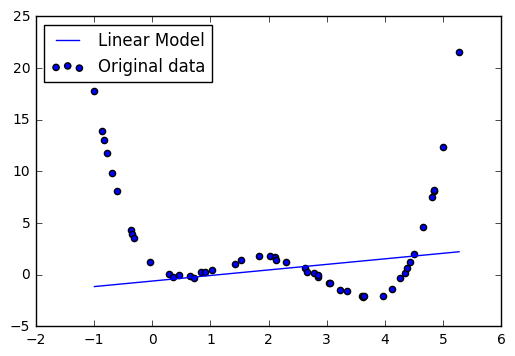

In [51]:
lr=linear_model.LinearRegression()
lr.fit(X_train.reshape(-1,1),Y_train)
plt.plot(X_test, lr.predict(X_test.reshape(-1,1)), label='Linear Model')
plt.scatter(X_test, Y_test, label='Original data')
plt.legend(loc='upper left')
plt.show()

Mean square error calculus

In [52]:
predictions=lr.predict(X_test.reshape(-1,1))
mean_square_e=mean_squared_error(Y_test, predictions)
print('Mean square error = ', mean_square_e)

Mean square error =  38.194301253


Fitting to a polynomial

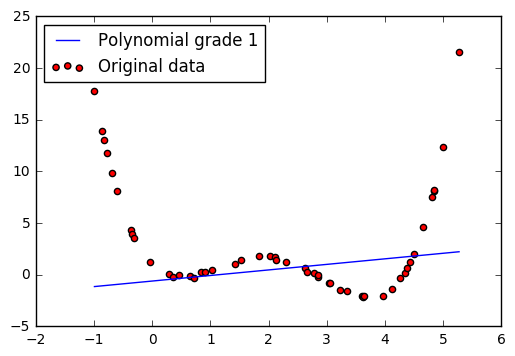

Mean square error with polynomial of grade  1  =  38.194301253


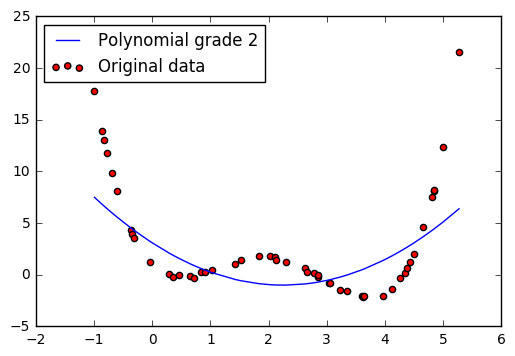

Mean square error with polynomial of grade  2  =  14.0058006393


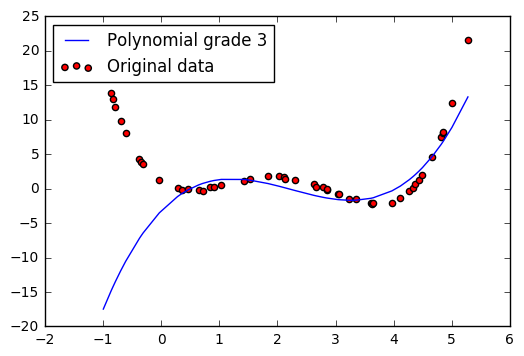

Mean square error with polynomial of grade  3  =  95.6221852729


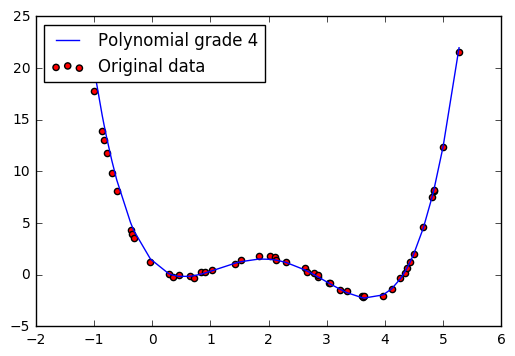

Mean square error with polynomial of grade  4  =  0.312266745267


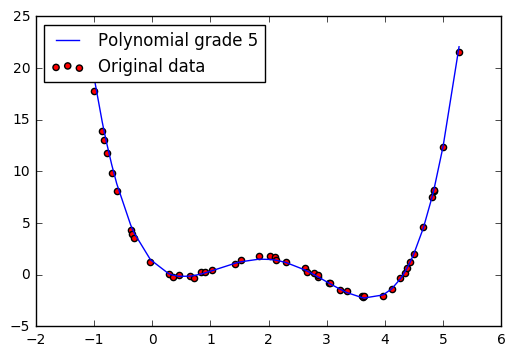

Mean square error with polynomial of grade  5  =  0.136255485149


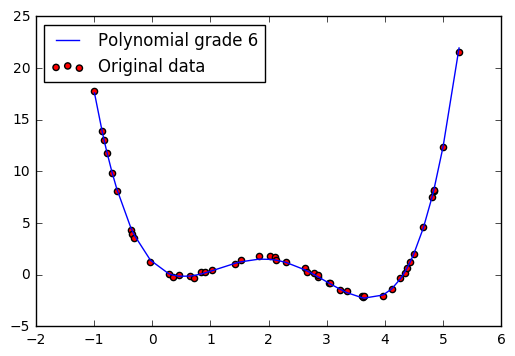

Mean square error with polynomial of grade  6  =  0.026085328866


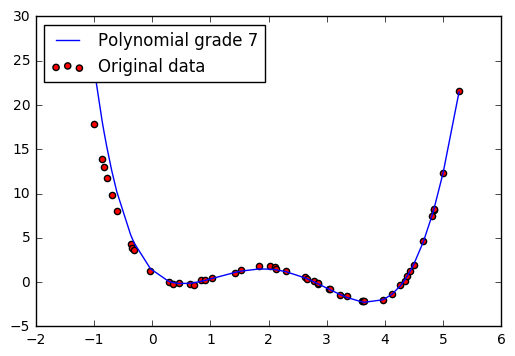

Mean square error with polynomial of grade  7  =  1.98759619456


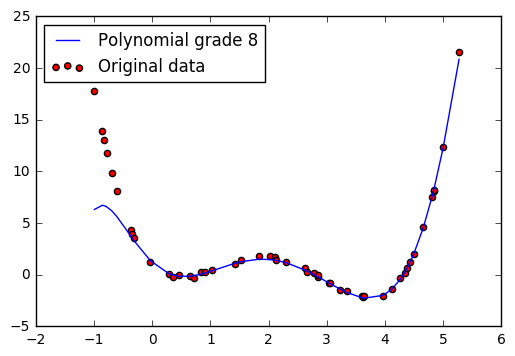

Mean square error with polynomial of grade  8  =  5.44563216798


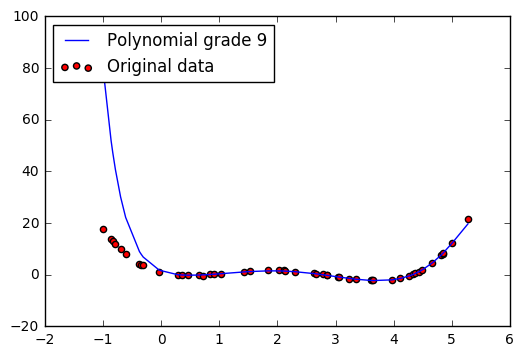

Mean square error with polynomial of grade  9  =  157.243473314


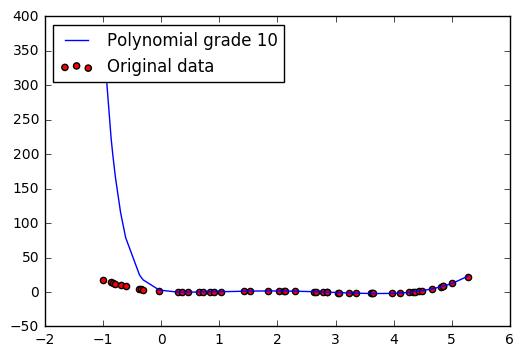

Mean square error with polynomial of grade  10  =  4859.53039206


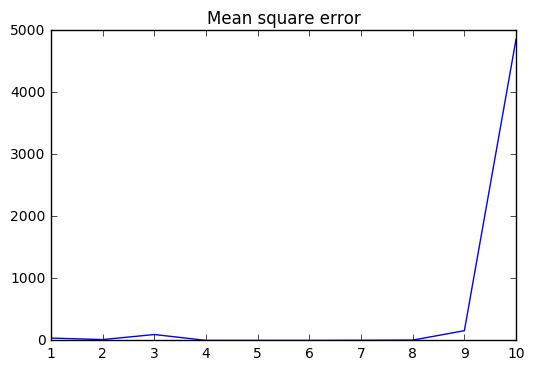

In [57]:
mean_square_error = []
poly_grade = range(1,11)
min_msq = mean_square_e
n=1
for i in poly_grade:
    poly=PolynomialFeatures(degree=i, include_bias=False)
    xPoly=poly.fit_transform(X_train.reshape(-1,1))
    lr=linear_model.LinearRegression()
    lr.fit(xPoly, Y_train) #xPoly fa sempre riferimento a X_train!
    #x_range=np.linspace(-1, 5.5, 100)
    X_test_i=poly.fit_transform(X_test.reshape(-1,1))
    predicted = lr.predict(X_test_i)
    plt.figure(i)
    plt.plot(X_test, predicted, label='Polynomial grade '+str(i))
    plt.scatter(X_test, Y_test, c='r', label='Original data')
    plt.legend(loc='upper left')
    msq=mean_squared_error(Y_test, predicted)
    mean_square_error.append(msq)
    plt.show()
    print('Mean square error with polynomial of grade ', i, ' = ', msq)
    if msq < min_msq:
        min_msq = msq
        n = i
        
plt.plot(poly_grade, mean_square_error)
plt.title('Mean square error')
plt.show()

The best polynomial choice is:

In [58]:
print('Minimum Square error = ', min_msq, " with polynomimal of grade ", n)

Minimum Square error =  0.026085328866  with polynomimal of grade  6
